In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np

In [34]:
df = pd.read_csv('DataBases/AAPL.csv')
df.drop(df.columns[[5,6,7,8, 10]],axis=1,inplace=True)
df

,date,open,high,low,close,vwap,changeOverTime
0,2014-02-21,69.9727,70.2061,68.8967,68.9821,69.4256,0.000000
1,2014-02-24,68.7063,69.5954,68.6104,69.2841,69.1567,0.004378
2,2014-02-25,69.5245,69.5488,68.4239,68.5631,68.9153,-0.006074
3,2014-02-26,68.7667,68.9492,67.7147,67.9446,68.1373,-0.015040
4,2014-02-27,67.9170,69.4457,67.7738,69.2999,68.8615,0.004607
...,...,...,...,...,...,...,...
1253,2019-02-13,171.3900,172.4800,169.9200,170.1800,171.0037,1.467017
1254,2019-02-14,169.7100,171.2615,169.3800,170.8000,170.6527,1.476005
1255,2019-02-15,171.2500,171.7000,169.7500,170.4200,170.4848,1.470496
1256,2019-02-19,169.7100,171.4400,169.4900,170.9300,170.5200,1.477889


In [35]:
df = df.set_index(['date'])

# vwap - средневзвешенная цена по объему. когда цена выше vwap, акции растут, а когда ниже - падают
# changeOverTime - изменения рыночных условий, технологий, предпочтений клиентов, конкуренции и корпоративных стратегий

df

,open,high,low,close,vwap,changeOverTime
date,,,,,,
2014-02-21,69.9727,70.2061,68.8967,68.9821,69.4256,0.000000
2014-02-24,68.7063,69.5954,68.6104,69.2841,69.1567,0.004378
2014-02-25,69.5245,69.5488,68.4239,68.5631,68.9153,-0.006074
2014-02-26,68.7667,68.9492,67.7147,67.9446,68.1373,-0.015040
2014-02-27,67.9170,69.4457,67.7738,69.2999,68.8615,0.004607
...,...,...,...,...,...,...
2019-02-13,171.3900,172.4800,169.9200,170.1800,171.0037,1.467017
2019-02-14,169.7100,171.2615,169.3800,170.8000,170.6527,1.476005
2019-02-15,171.2500,171.7000,169.7500,170.4200,170.4848,1.470496


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2014-02-21 to 2019-02-20
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            1258 non-null   float64
 1   high            1258 non-null   float64
 2   low             1258 non-null   float64
 3   close           1258 non-null   float64
 4   vwap            1258 non-null   float64
 5   changeOverTime  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8+ KB


In [37]:
df = df[['open', 'high', 'low', 'close', 'changeOverTime', 'vwap']]
df

,open,high,low,close,changeOverTime,vwap
date,,,,,,
2014-02-21,69.9727,70.2061,68.8967,68.9821,0.000000,69.4256
2014-02-24,68.7063,69.5954,68.6104,69.2841,0.004378,69.1567
2014-02-25,69.5245,69.5488,68.4239,68.5631,-0.006074,68.9153
2014-02-26,68.7667,68.9492,67.7147,67.9446,-0.015040,68.1373
2014-02-27,67.9170,69.4457,67.7738,69.2999,0.004607,68.8615
...,...,...,...,...,...,...
2019-02-13,171.3900,172.4800,169.9200,170.1800,1.467017,171.0037
2019-02-14,169.7100,171.2615,169.3800,170.8000,1.476005,170.6527
2019-02-15,171.2500,171.7000,169.7500,170.4200,1.470496,170.4848


# `Без нормализации`

In [38]:
x_train, x_test, y_train, y_test1 = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], random_state=42, shuffle=True, test_size=0.25)

In [39]:
clf = LinearRegression().fit(x_train, y_train)
y_pred1= clf.predict(x_test).round(6)
df

,open,high,low,close,changeOverTime,vwap
date,,,,,,
2014-02-21,69.9727,70.2061,68.8967,68.9821,0.000000,69.4256
2014-02-24,68.7063,69.5954,68.6104,69.2841,0.004378,69.1567
2014-02-25,69.5245,69.5488,68.4239,68.5631,-0.006074,68.9153
2014-02-26,68.7667,68.9492,67.7147,67.9446,-0.015040,68.1373
2014-02-27,67.9170,69.4457,67.7738,69.2999,0.004607,68.8615
...,...,...,...,...,...,...
2019-02-13,171.3900,172.4800,169.9200,170.1800,1.467017,171.0037
2019-02-14,169.7100,171.2615,169.3800,170.8000,1.476005,170.6527
2019-02-15,171.2500,171.7000,169.7500,170.4200,1.470496,170.4848


# `Standart Scaler`

In [40]:
scaled_data = StandardScaler().fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

x_train, x_test, y_train, y_test2 = train_test_split(scaled_df.iloc[:, :-1], scaled_df.iloc[:, -1], 
                                                    random_state=42, shuffle=True, test_size=0.25)

scaled_df

,open,high,low,close,changeOverTime,vwap
0,-1.534248,-1.542730,-1.547925,-1.560992,-1.560992,-1.549320
1,-1.567388,-1.558562,-1.555490,-1.553088,-1.553088,-1.556357
2,-1.545977,-1.559770,-1.560418,-1.571958,-1.571958,-1.562674
3,-1.565807,-1.575315,-1.579159,-1.588145,-1.588145,-1.583033
4,-1.588043,-1.562443,-1.577597,-1.552674,-1.552674,-1.564082
...,...,...,...,...,...,...
1253,1.119703,1.108641,1.121593,1.087566,1.087566,1.108841
1254,1.075740,1.077052,1.107324,1.103793,1.103793,1.099656
1255,1.116040,1.088420,1.117101,1.093847,1.093847,1.095263
1256,1.075740,1.081680,1.110230,1.107195,1.107195,1.096184


In [41]:
clf = LinearRegression().fit(x_train, y_train)
y_pred2 = clf.predict(x_test)

# Quantile Transformer

In [42]:
scaled_data = QuantileTransformer().fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

x_train, x_test, y_train, y_test3 = train_test_split(scaled_df.iloc[:, :-1], 
                                                    scaled_df.iloc[:, -1], random_state=42, shuffle=True, test_size=0.25)

scaled_df

,open,high,low,close,changeOverTime,vwap
0,0.023023,0.021401,0.014113,0.009276,0.009276,0.015145
1,0.005715,0.007454,0.009481,0.011999,0.011999,0.011070
2,0.015834,0.006559,0.006537,0.003953,0.003953,0.007921
3,0.007030,0.003297,0.001826,0.000000,0.000000,0.001791
4,0.000000,0.005632,0.002207,0.012784,0.012784,0.007013
...,...,...,...,...,...,...
1253,0.848840,0.847935,0.843920,0.825952,0.825952,0.842393
1254,0.821693,0.824935,0.832964,0.837543,0.837543,0.835201
1255,0.846377,0.834457,0.840349,0.832844,0.832844,0.832296
1256,0.821693,0.828930,0.833825,0.840863,0.840863,0.832947


In [43]:
clf = LinearRegression().fit(x_train, y_train)
y_pred3 = clf.predict(x_test)

# MinMaxSaler

In [44]:
scaled_data = MinMaxScaler().fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

x_train, x_test, y_train, y_test4 = train_test_split(scaled_df.iloc[:, :-1], 
                                                    scaled_df.iloc[:, -1], random_state=42, shuffle=True, test_size=0.25)

scaled_df

,open,high,low,close,changeOverTime,vwap
0,0.012762,0.010846,0.010835,0.006391,0.006391,0.069839
1,0.004900,0.007105,0.009055,0.008252,0.008252,0.068286
2,0.009980,0.006819,0.007896,0.003810,0.003810,0.066891
3,0.005275,0.003146,0.003486,0.000000,0.000000,0.062397
4,0.000000,0.006188,0.003854,0.008349,0.008349,0.066580
...,...,...,...,...,...,...
1253,0.642377,0.637414,0.638897,0.629797,0.629797,0.656649
1254,0.631947,0.629949,0.635540,0.633616,0.633616,0.654621
1255,0.641508,0.632635,0.637840,0.631275,0.631275,0.653651
1256,0.631947,0.631042,0.636224,0.634417,0.634417,0.653855


In [45]:
clf = LinearRegression().fit(x_train, y_train)
y_pred4 = clf.predict(x_test)

# Анализ созданных моделей

In [46]:
print(f'без нонрмализации: {mean_squared_error(y_pred1, y_test1).round(10)}')
print(f'StandartScaler: {mean_squared_error(y_pred2, y_test2).round(10)}')
print(f'QuantileTransformer: {mean_squared_error(y_pred3, y_test3).round(10)}')
print(f'MinMaxScaler: {mean_squared_error(y_pred4, y_test4).round(10)}')

minimum = min(mean_squared_error(y_pred1, y_test1), mean_squared_error(y_pred2, y_test2),
        mean_squared_error(y_pred3, y_test3), mean_squared_error(y_pred4, y_test4))

maximum = max(mean_squared_error(y_pred1, y_test1), mean_squared_error(y_pred2, y_test2),
        mean_squared_error(y_pred3, y_test3), mean_squared_error(y_pred4, y_test4))

print(f'лучший показатель у MinMaxScaler: {minimum}')
print(f'худший показатель у модели без обработки: {maximum}')

без нонрмализации: 0.2425942797
StandartScaler: 0.0001661281
QuantileTransformer: 3.28136e-05
MinMaxScaler: 8.0961e-06
лучший показатель у MinMaxScaler: 8.096090327683992e-06
худший показатель у модели без обработки: 0.24259427969829814


# Создание модели, учитывая подобранный стандартизатор

In [47]:
sc_sign = MinMaxScaler()
sc_target = MinMaxScaler()

# отдельно стандартизирую признаки
scaled_sign_data = sc_sign.fit_transform(df.iloc[:, :-1])
scaled_sign_df = pd.DataFrame(scaled_sign_data, columns=df.columns[:-1])

# отдельно стандартизирую результат
scaled_reshaped_data = np.reshape(df['vwap'], (-1, 1))
scaled_target_data = sc_target.fit_transform(scaled_reshaped_data)
scaled_target_df = pd.DataFrame(scaled_target_data, columns=['vwap'])
scaled_target_df, scaled_sign_df

(          vwap
 0     0.069839
 1     0.068286
 2     0.066891
 3     0.062397
 4     0.066580
 ...        ...
 1253  0.656649
 1254  0.654621
 1255  0.653651
 1256  0.653855
 1257  0.663635
 
 [1258 rows x 1 columns],
           open      high       low     close  changeOverTime
 0     0.012762  0.010846  0.010835  0.006391        0.006391
 1     0.004900  0.007105  0.009055  0.008252        0.008252
 2     0.009980  0.006819  0.007896  0.003810        0.003810
 3     0.005275  0.003146  0.003486  0.000000        0.000000
 4     0.000000  0.006188  0.003854  0.008349        0.008349
 ...        ...       ...       ...       ...             ...
 1253  0.642377  0.637414  0.638897  0.629797        0.629797
 1254  0.631947  0.629949  0.635540  0.633616        0.633616
 1255  0.641508  0.632635  0.637840  0.631275        0.631275
 1256  0.631947  0.631042  0.636224  0.634417        0.634417
 1257  0.641135  0.642560  0.645549  0.641193        0.641193
 
 [1258 rows x 5 columns])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(scaled_sign_df, scaled_target_df, random_state=1,
                                                    shuffle=False, test_size=0.25)

In [49]:
clf = LinearRegression().fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [50]:
norm_y_test = sc_target.inverse_transform(y_test)
norm_y_train = sc_target.inverse_transform(y_train)
norm_y_pred = sc_target.inverse_transform(y_pred)

In [51]:
df

,open,high,low,close,changeOverTime,vwap
date,,,,,,
2014-02-21,69.9727,70.2061,68.8967,68.9821,0.000000,69.4256
2014-02-24,68.7063,69.5954,68.6104,69.2841,0.004378,69.1567
2014-02-25,69.5245,69.5488,68.4239,68.5631,-0.006074,68.9153
2014-02-26,68.7667,68.9492,67.7147,67.9446,-0.015040,68.1373
2014-02-27,67.9170,69.4457,67.7738,69.2999,0.004607,68.8615
...,...,...,...,...,...,...
2019-02-13,171.3900,172.4800,169.9200,170.1800,1.467017,171.0037
2019-02-14,169.7100,171.2615,169.3800,170.8000,1.476005,170.6527
2019-02-15,171.2500,171.7000,169.7500,170.4200,1.470496,170.4848


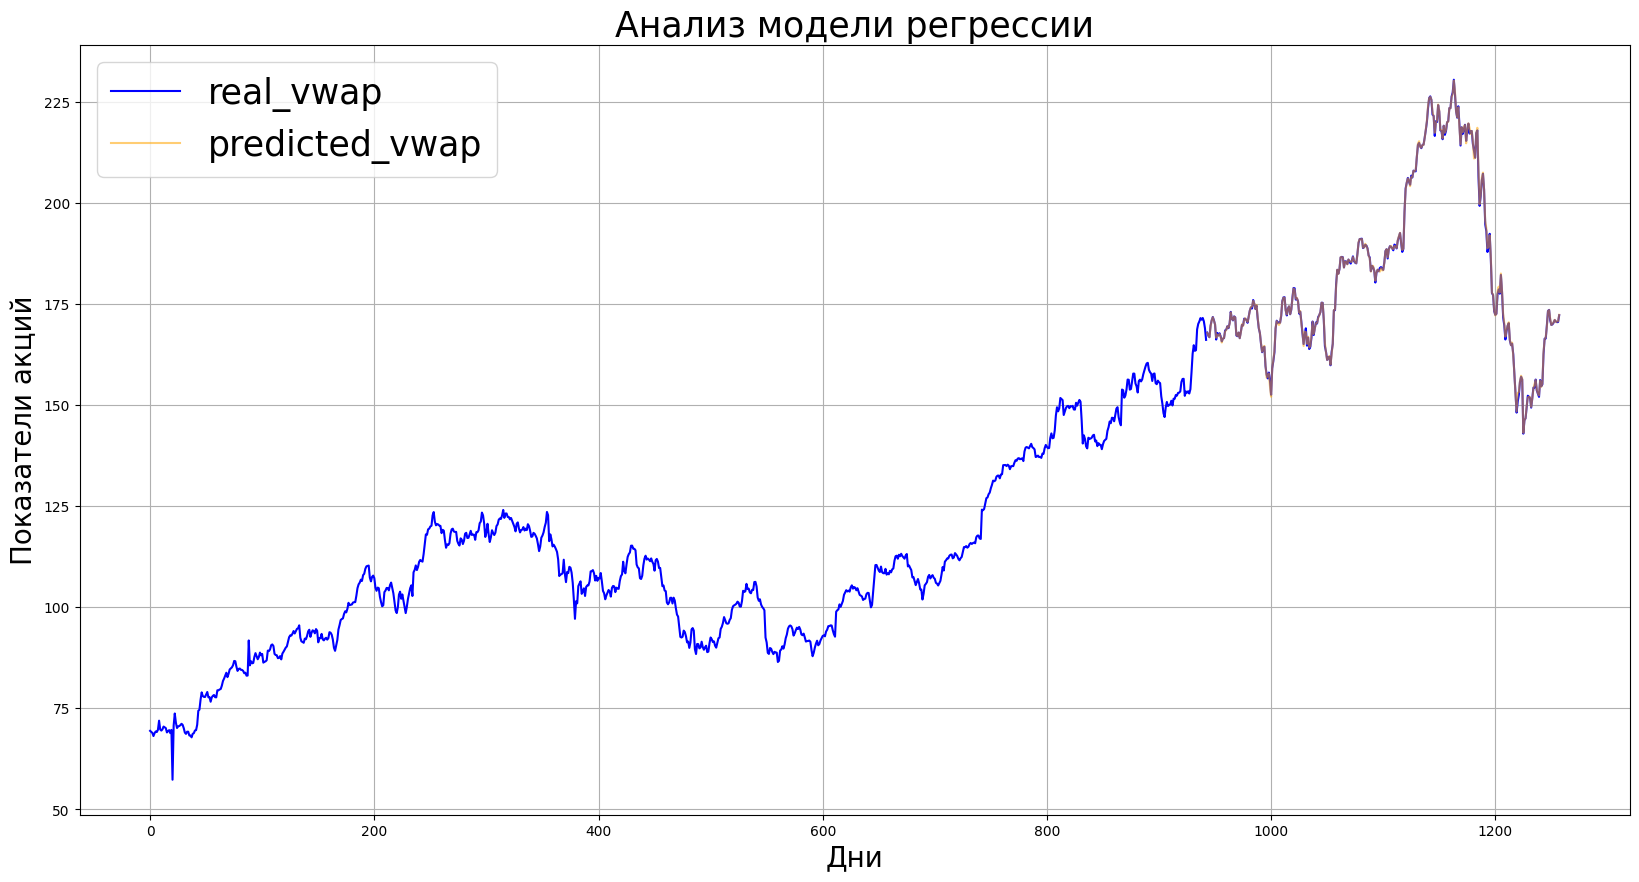

In [65]:
plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title('Анализ модели регрессии', fontsize=25)
plt.xlabel('Дни', fontsize=20)
plt.ylabel('Показатели акций', fontsize=20)
plt.plot(range(len(x_train)), norm_y_train, label='real_vwap', c='blue')
plt.plot(range(len(x_train), len(df)), norm_y_test, c='blue')
plt.plot(range(len(x_train), len(df)), norm_y_pred, c='orange', label='predicted_vwap', alpha=0.55)
plt.legend(loc='upper left', fontsize=25)